<a href="https://colab.research.google.com/github/saktheeswaranswan/random-math-addition-data-for-rnn-generator/blob/main/radllogan_fem_testing_branching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[  95.99   51.35  -31.63    2.26    0.      0.     20.39   -0.75  -95.82
   -52.85]
 [  51.35  108.74  -11.33   33.98    0.      0.      0.75  -26.43  -67.96
  -116.29]
 [ -31.63  -11.33  158.33  -84.59   52.52   12.84    0.      0.   -139.23
    83.07]
 [   2.26   33.98  -84.59  135.94  -12.84  -41.54    0.      0.     67.98
  -128.38]
 [   0.      0.     52.52  -12.84  158.32   84.59  -31.63   11.33 -139.23
   -83.07]
 [   0.      0.     12.84  -41.54   84.59  135.94   -2.26   33.98  -67.98
  -128.38]
 [  20.39    0.75    0.      0.    -31.63   -2.25   95.99  -51.35  -95.82
    52.86]
 [  -0.75  -26.43    0.      0.     11.33   33.98  -51.35  108.74   67.96
  -116.29]
 [ -95.82  -67.96 -139.23   67.98 -139.23  -67.98  -95.82   67.96  498.99
     0.  ]
 [ -52.85 -116.29   83.07 -128.38  -83.07 -128.38   52.86 -116.29    0.
   489.36]]


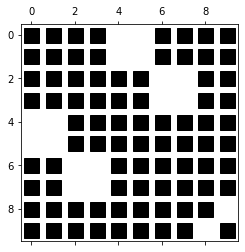

In [13]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


def generate_indices_csv(filename, n, num_element_stiffness_matrices):
    indices = np.zeros((num_element_stiffness_matrices, 6), dtype=int)
    for i in range(num_element_stiffness_matrices):
        indices[i, :] = np.random.randint(1, n+1, 6)
    df = pd.DataFrame(indices, columns=['i1', 'i2', 'i3', 'i4', 'i5','i6'])
    df.to_csv(filename, index=False)

def assemble_global_stiffness_matrix(n, element_stiffness_matrices, indices_df):
    global_stiffness_matrix = np.zeros((n, n))
    for i, row in indices_df.iterrows():
        index = row.tolist()
        for row in range(element_stiffness_matrices[i].shape[0]):
            for col in range(element_stiffness_matrices[i].shape[1]):
                if index[row] <= n and index[col] <= n:
                    global_stiffness_matrix[index[row]-1, index[col]-1] += element_stiffness_matrices[i][row, col]
    return global_stiffness_matrix

n = 10
num_element_stiffness_matrices = 4
element_stiffness_matrices = [np.array([[54.46,29.45,-31.63,2.26,-29.37,-31.71],[29.45,61.17,-11.33,33.98,-31.72,-95.15],[-31.63,-11.33,72.59,-38.52,-20.31,49.84],[2.26,33.98,-38.52,61.17,22.66,-95.15],[-29.37,-31.72,-20.31,22.66,56.72,9.06],[-31.71,-95.15,49.84,-95.15,9.06,190.31]]),np.array([[85.74,-46.07,52.52,12.84,-118.92,33.23],[-46.07,74.77,-12.84,-41.54,45.32,-33.23],[52.52,-12.84,85.74,46.07,-118.92,-33.23],[12.84,-41.54,46.07,74.77,-45.32,-33.23],[-118.92,45.32,-118.92,-45.32,216.41,0],[33.23,-33.23,-33.23,-33.23,0,66.46]]),np.array([[72.58,38.52,-31.63,11.33,-20.31,-49.84],[38.52,61.17,-2.26,33.98,-22.66,-95.15],[-31.63,-2.25,54.46,-29.45,-29.37,31.72],[11.33,33.98,-29.45,61.17,31.72,-95.15],[-20.31,-22.66,-29.37,31.72,56.72,-9.06],[-49.84,-95.15,31.72,-95.15,-9.06,190.31]]),np.array([[41.53,-21.90,20.39,.75,-66.45,21.14],[-21.90,47.57,-.75,-26.43,36.24,-21.14],[20.39,-.75,41.53,21.90,-66.45,-21.14],[.75,-26.43,21.90,47.57,-36.24,-21.14],[-66.45,36.24,-66.45,-36.24,169.14,0],[21.14,-21.14,-21.14,-21.14,0,42.28]])]                             
#filename = '/content/indices6.csv'
#generate_indices_csv(filename, n, num_element_stiffness_matrices)
indices_df = pd.read_csv('/content/indices4dllogan.csv')
global_stiffness_matrix = assemble_global_stiffness_matrix(n, element_stiffness_matrices, indices_df)
print(global_stiffness_matrix)
# Plot the global stiffness matrix as a sparse plot array
plt.spy(global_stiffness_matrix, markersize=15, color='black')
plt.show()
# Save the global stiffness matrix in a text file
np.savetxt("global_stiffness_matrix.txt", global_stiffness_matrix, fmt='%d')
import numpy as np

with open('global_stiffness_matrixf.py', 'w') as f:
    f.write('import numpy as np\n\n')
    f.write('global_stiffness_matrix = np.array([\n')
    for i in range(global_stiffness_matrix.shape[0]):
        f.write('    [')
        for j in range(global_stiffness_matrix.shape[1]):
            f.write(str(global_stiffness_matrix[i][j]))
            if j < global_stiffness_matrix.shape[1] - 1:
                f.write(', ')
        f.write(']')
        if i < global_stiffness_matrix.shape[0] - 1:
            f.write(',\n')
    f.write('])\n')


In [ ]:
#dl 427 pgno

[[ 1.2889  0.4701 -0.2899 -0.4701 -1.      0.      0.      0.      0.
   0.    ]
 [ 0.4701  0.7622 -0.4701  0.7622  0.      0.      0.      0.      0.
   0.    ]
 [-0.2899 -0.4701  1.5788  0.     -0.2899  0.4701 -1.      0.      0.
   0.    ]
 [-0.4701 -0.7622  0.      1.5244  0.4701 -0.7622  0.      0.      0.
   0.    ]
 [-1.      0.     -0.2899  0.4701  2.5788  0.     -0.2899 -0.4701 -1.
   0.    ]
 [ 0.      0.      0.4701 -0.7622  0.      1.5244 -0.4701  0.7622  0.
   0.    ]
 [ 0.      0.     -1.      0.     -0.2899 -0.4701  1.5788  0.     -0.2899
   0.4701]
 [ 0.      0.      0.      0.     -0.4701 -0.7622  0.      1.5244  0.4701
  -0.7622]
 [ 0.      0.      0.      0.     -1.      0.     -0.2899  0.4701  1.2899
  -0.4701]
 [ 0.      0.      0.      0.      0.      0.      0.4701 -0.7622 -0.4701
   0.7622]]


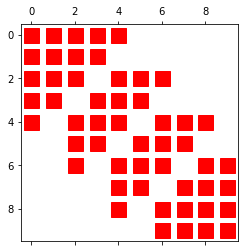

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def generate_indices_csv(filename, n, num_element_stiffness_matrices):
    indices = np.zeros((num_element_stiffness_matrices, 4), dtype=int)
    for i in range(num_element_stiffness_matrices):
        indices[i, :] = np.random.randint(1, n+1, 4)
    df = pd.DataFrame(indices, columns=['i1', 'i2', 'i3','i4'])
    df.to_csv(filename, index=False)

def assemble_global_stiffness_matrix(n, element_stiffness_matrices, indices_df):
    global_stiffness_matrix = np.zeros((n, n))
    for i, row in indices_df.iterrows():
        index = row.tolist()
        for row in range(element_stiffness_matrices[i].shape[0]):
            for col in range(element_stiffness_matrices[i].shape[1]):
                if index[row] <= n and index[col] <= n:
                    global_stiffness_matrix[index[row]-1, index[col]-1] += element_stiffness_matrices[i][row, col]
    return global_stiffness_matrix

n = 10
num_element_stiffness_matrices = 7

element_stiffness_matrices =[np.array([[.2889, .4701,-.2899,-.4701], [.4701, .7622,-.4701,.7622],[-.2899, -.4701,.2899,.4701], [-.4701, -.7622,.4701,.7622]]),
np.array([[1, 0,-1,0], [0, 0,0,0],[-1, 0,1,0], [0, 0,0,0]])
,np.array([[.2889, -.4701,-.2899,.4701], [-.4701, .7622,.4701,-.7622],[-.2899, .4701,.2899,-.4701], [.4701, -.7622,-.4701,.7622]])
,np.array([[1, 0,-1,0], [0, 0,0,0],[-1, 0,1,0], [0, 0,0,0]])
,np.array([[.2889, .4701,-.2899,-.4701], [.4701, .7622,-.4701,.7622],[-.2899, -.4701,.2899,.4701], [-.4701, -.7622,.4701,.7622]])
,np.array([[1, 0,-1,0], [0, 0,0,0],[-1, 0,1,0], [0, 0,0,0]])
,np.array([[.2889, -.4701,-.2899,.4701], [-.4701, .7622,.4701,-.7622],[-.2899, .4701,.2899,-.4701], [.4701, -.7622,-.4701,.7622]])]
#filename = 'indices.csv'
#generate_indices_csv(filename, n, num_element_stiffness_matrices)
indices_df = pd.read_csv('/content/indices4.csv')
global_stiffness_matrix = assemble_global_stiffness_matrix(n, element_stiffness_matrices, indices_df)
print(global_stiffness_matrix)
# Plot the global stiffness matrix as a sparse plot array
plt.spy(global_stiffness_matrix, markersize=15, color='red')
plt.show()
# Save the global stiffness matrix in a text file
np.savetxt("global_stiffness_matrix.txt", global_stiffness_matrix, fmt='%d')
# Save the global stiffness matrix in Python matrix format
import numpy as np

with open('global_stiffness_matrix.py', 'w') as f:
    f.write('import numpy as np\n\n')
    f.write('global_stiffness_matrix = np.array([\n')
    for i in range(global_stiffness_matrix.shape[0]):
        f.write('    [')
        for j in range(global_stiffness_matrix.shape[1]):
            f.write(str(global_stiffness_matrix[i][j]))
            if j < global_stiffness_matrix.shape[1] - 1:
                f.write(', ')
        f.write(']')
        if i < global_stiffness_matrix.shape[0] - 1:
            f.write(',\n')
    f.write('])\n')

In [ ]:
#rao pgno 157
#THE FORCE VECTOR LOOKS LIKE THIS
#[0,0,0,0,0,-100,0,0,0,0] SO YOU CAN SOLVE FOR THIS VECTOR
# THE ABOVE RESULTS ARE CORRECT AND TESTED

[[ 18.11   30.184   0.      0.      0.      0.      0.      0.      0.
  -18.11  -30.184   0.   ]
 [ 30.184  50.35    0.      0.      0.      0.      0.      0.      0.
  -30.184 -50.35    0.   ]
 [  0.      0.      0.      0.      0.      0.      0.      0.      0.
    0.      0.      0.   ]
 [  0.      0.      0.      8.425 -21.097   8.425   0.      0.      0.
   -8.425  21.097  -8.425]
 [  0.      0.      0.    -21.097  52.707 -21.037   0.      0.      0.
   21.09  -52.707  21.097]
 [  0.      0.      0.      8.425 -21.097   8.425   0.      0.      0.
   -8.425  21.097  -8.425]
 [  0.      0.      0.      0.      0.      0.      8.425  21.097  -8.425
   -8.425  21.097   8.425]
 [  0.      0.      0.      0.      0.      0.    -21.097  52.707  21.097
   21.097 -52.707 -21.097]
 [  0.      0.      0.      0.      0.      0.     -8.425  21.097   8.425
    8.425 -21.097  -8.425]
 [-18.11  -30.184   0.     -8.425  21.097  -8.425  -8.425  21.097   8.425
   34.96  -12.01    0.   ]
 [-30.18

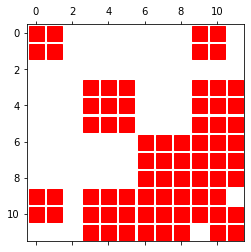

In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


def generate_indices_csv(filename, n, num_element_stiffness_matrices):
    indices = np.zeros((num_element_stiffness_matrices, 6), dtype=int)
    for i in range(num_element_stiffness_matrices):
        indices[i, :] = np.random.randint(1, n+1, 6)
    df = pd.DataFrame(indices, columns=['i1', 'i2', 'i3', 'i4', 'i5','i6'])
    df.to_csv(filename, index=False)

def assemble_global_stiffness_matrix(n, element_stiffness_matrices, indices_df):
    global_stiffness_matrix = np.zeros((n, n))
    for i, row in indices_df.iterrows():
        index = row.tolist()
        for row in range(element_stiffness_matrices[i].shape[0]):
            for col in range(element_stiffness_matrices[i].shape[1]):
                if index[row] <= n and index[col] <= n:
                    global_stiffness_matrix[index[row]-1, index[col]-1] += element_stiffness_matrices[i][row, col]
    return global_stiffness_matrix

n = 12
num_element_stiffness_matrices = 3
element_stiffness_matrices =[
np.array([[18.11,30.184,0,-18.11,-30.184,0], [30.184,50.350,0,-30.184,-50.350,0],[0,0,0,0,0,0], [-18.11,-30.184,0,18.11,30.184,0],[-30.184,-50.350,0,30.184,50.350,0], [0,0,0,0,0,0]])
,np.array([[8.425,-21.097,8.425,-8.425,21.097,-8.425], [-21.097,52.707,-21.037,21.09,-52.707,21.097],[8.425,-21.097,8.425,-8.425,21.097,-8.425], [-8.425,21.097,-8.425,8.425,-21.097,8.425],[21.097,-52.707,21.097,-21.097,52.707,21.097], [-8.425,21.097,-8.425,8.425,-21.097,8.425]])
,np.array([[8.425,21.097,-8.425,-8.425,21.097,8.425], [-21.097,52.707,21.097,21.097,-52.707,-21.097],[-8.425,21.097,8.425,8.425,-21.097,-8.425], [-8.425,21.097,8.425,8.425,-21.097,-8.425],[21.097,-52.707,-21.097,-21.097,52.707,21.097], [8.425,-21.097,-8.425,-8.425,-8.425,21.097]])]


#filename = '/content/indices6.csv'
#generate_indices_csv(filename, n, num_element_stiffness_matrices)
indices_df = pd.read_csv('/content/truss6rao.csv')
global_stiffness_matrix = assemble_global_stiffness_matrix(n, element_stiffness_matrices, indices_df)
print(global_stiffness_matrix)
# Plot the global stiffness matrix as a sparse plot array
plt.spy(global_stiffness_matrix, markersize=15, color='red')
plt.show()
# Save the global stiffness matrix in a text file
np.savetxt("global_stiffness_matrix.txt", global_stiffness_matrix, fmt='%d')
import numpy as np

with open('global_stiffness_macctrix.py', 'w') as f:
    f.write('import numpy as np\n\n')
    f.write('global_stiffness_matrix = np.array([\n')
    for i in range(global_stiffness_matrix.shape[0]):
        f.write('    [')
        for j in range(global_stiffness_matrix.shape[1]):
            f.write(str(global_stiffness_matrix[i][j]))
            if j < global_stiffness_matrix.shape[1] - 1:
                f.write(', ')
        f.write(']')
        if i < global_stiffness_matrix.shape[0] - 1:
            f.write(',\n')
    f.write('])\n')

In [ ]:
#pgno rao 163
#force vector [0,0,0,0,0,0,0,0,0,0,-10,0]